In [1]:
import scipy.stats as jp
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
infile = open ("qcd_100000_pt_1000_1200.pkl",'rb')
ram = pickle.load(infile)
ranch = pickle.load(open("higgs_100000_pt_1000_1200.pkl",'rb'))

We seek to find the expected significance of the background plus signal. We first need to find the mean of the distribution. We are assuming the background and signal to be Poisson distributed in counts of events, with given means of $\mu_{background} = \mu_b = 2000$ and $\mu_{Higgs} = \mu_H = 50$. The overall counts distribution, as a sum of Poisson distributions (see last lab) will be Poisson with mean $\mu = \mu_b + \mu_H = 2050$. The expected significance is expected in the frequentist sense: if we were to take measurements from this combined distribution many times, the average significance of the measurement is what we seek. The average measurement we will take will be the mean of this distribution, and then events of larger numbers of counts are more signal like, as a low number of counts is always possible, but higher numbers of counts are indicative of some extra process (in our case, a Higgs mechanism increasing the counts). The expected significance is then the significance of the expected value, and we find this by integrating from the mean of this full distribution upwards to infinity on the pmf - but the pmf is the pmf of the assumed background, not the full distribution, as this is a null hypothesis test. Integrate, and note by normalization of the pmf this integral is equivalent to 1 minus the integral from 0 to the mean $\mu$ of the full distribution.

In [15]:
p = 0
for i in range(2050):
    p += jp.poisson.pmf(i, mu=2000)
sig = jp.norm.ppf(p)
print('We calculate a significance of {} sigma.'.format(str(sig)))

We calculate a significance of 1.1060461130380514 sigma.


Pathetic! We make our stacked histogram of the two data, weighting appropriately. We note that we expect for this high pT sample a yield of 50 for Higgs events, and a yield of 2000 for QCD events, so overall we have 2050 events, and we want to weight our Higgs data to be 50/2050, with the QCD background weighted at 2000/2050.

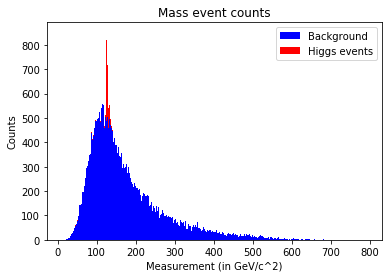

In [7]:
wt = np.ones(ram.get('mass').size)

plt.hist([ram.get('mass'), ranch.get('mass')], bins = 1000, weights=[(2000 / 2050) * wt, (50 / 2050) * wt], histtype='barstacked', color=['b', 'r'], label=['Background', 'Higgs events'])
# plt.hist(ram.get('mass'), bins = 1000, weights=50 / 2050, histtype='barstacked', color='b')
plt.xlabel('Measurement (in GeV/c^2)')
plt.ylabel('Counts')
plt.title('Mass event counts')
plt.legend()
plt.show()

In [9]:
print(50 / np.sqrt(2000))

1.118033988749895


In [ ]:
mH = 125